### Edge Types

### Setup

In [1]:
import sys
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

%matplotlib inline

In [2]:
DATA_DIR = "../data/wsdm-2022/raw"

print("FILES")
print(sorted(os.listdir(f"{DATA_DIR}/train")))
print(sorted(os.listdir(f"{DATA_DIR}/test")))

FILES
['edge_type_features.csv', 'edges_train_A.csv', 'edges_train_A_cache.pickle', 'edges_train_B.csv', 'node_features.csv']
['input_A.csv', 'input_A_initial.csv', 'input_B.csv', 'input_B_initial.csv']


In [3]:
edge_list = pd.read_csv(
    f"{DATA_DIR}/train/edges_train_B.csv",
    header=None,
    names=['src_id', 'dst_id', 'edge_type', 'timestamp', 'etc'],
    dtype={'src_id': str, 'dst_id': str, 'edge_type': str, 'timestamp': int, 'etc': str},
).sort_values('timestamp')

In [4]:
print(f"EDGEs: {len(edge_list)}")
edge_list.head()

EDGEs: 8278431


,src_id,dst_id,edge_type,timestamp,etc
0,21499,21012,2,1420074012,NaN
1,672377,795545,12,1420074016,NaN
2,104556,264221,12,1420074016,NaN
3,653813,772791,12,1420074017,NaN
4,21500,21013,2,1420074021,NaN


In [5]:
timestamps = edge_list['timestamp'].copy()
datetimes = timestamps.apply(
    lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y%m%d_%H%M%S")
)
dates = timestamps.apply(
    lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y%m%d")
)
edge_list['datetime'] = datetimes
edge_list['date'] = dates
edge_list

,src_id,dst_id,edge_type,timestamp,etc,datetime,date
0,21499,21012,2,1420074012,NaN,20150101_100012,20150101
1,672377,795545,12,1420074016,NaN,20150101_100016,20150101
2,104556,264221,12,1420074016,NaN,20150101_100016,20150101
3,653813,772791,12,1420074017,NaN,20150101_100017,20150101
4,21500,21013,2,1420074021,NaN,20150101_100021,20150101
...,...,...,...,...,...,...,...
8278426,386544,465515,2,1443628795,NaN,20151001_005955,20151001
8278427,238097,446963,12,1443628798,NaN,20151001_005958,20151001
8278429,376663,452473,12,1443628799,NaN,20151001_005959,20151001
8278428,343979,409898,2,1443628799,NaN,20151001_005959,20151001


### Edge Type Distribution

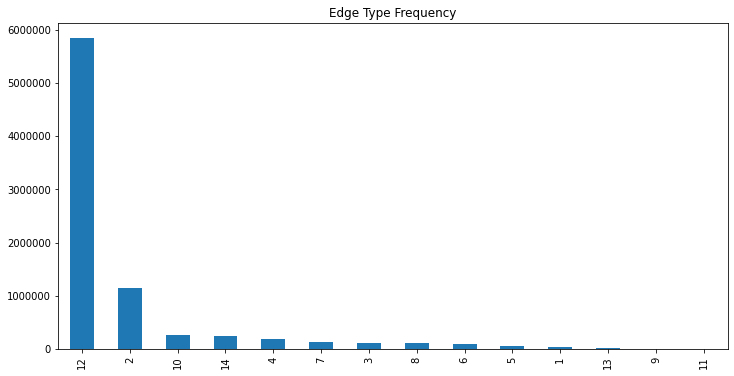

In [6]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(12, 6))

edge_list['edge_type'].value_counts()[:100].plot(
    kind='bar', ax=ax, title="Edge Type Frequency"
)

for axis in [ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

### Top 10 Edge Types

In [7]:
top_10_edge_type = list(edge_list['edge_type'].value_counts()[:10].index)
top_10_edge_type

['12', '2', '10', '14', '4', '7', '3', '8', '6', '5']

In [8]:
top_10_edge_list = edge_list[edge_list['edge_type'].isin(top_10_edge_type)]
print(f"{len(top_10_edge_list)}/{len(edge_list)}={int(len(top_10_edge_list))/int(len(edge_list))}")
top_10_edge_list.head()

8209715/8278431=0.9916993932787506


,src_id,dst_id,edge_type,timestamp,etc,datetime,date
0,21499,21012,2,1420074012,NaN,20150101_100012,20150101
1,672377,795545,12,1420074016,NaN,20150101_100016,20150101
2,104556,264221,12,1420074016,NaN,20150101_100016,20150101
3,653813,772791,12,1420074017,NaN,20150101_100017,20150101
4,21500,21013,2,1420074021,NaN,20150101_100021,20150101


In [9]:
top_10_edge_type_daily_count = top_10_edge_list \
                                    .groupby(['date', 'edge_type']).size() \
                                    .reset_index(name='count') \
                                    .sort_values(['date', 'count'], ascending=[True, False])

top_10_edge_type_daily_count.head(10)

,date,edge_type,count
1,20150101,12,4235
3,20150101,2,710
2,20150101,14,192
0,20150101,10,176
4,20150101,3,138
8,20150101,7,127
5,20150101,4,121
6,20150101,5,92
7,20150101,6,84
9,20150101,8,42


In [10]:
# top_10_edge_type = list(edge_list['edge_type'].value_counts()[:10].index)
# top_10_edge_list = edge_list[edge_list['edge_type'].isin(top_10_edge_type)]
# top_10_edge_list_count = top_10_edge_list.groupby(['date', 'edge_type'])
# top_10_edge_list_count = top_10_edge_list_count.size().reset_index(name='count')
# top_10_edge_list_count.head()

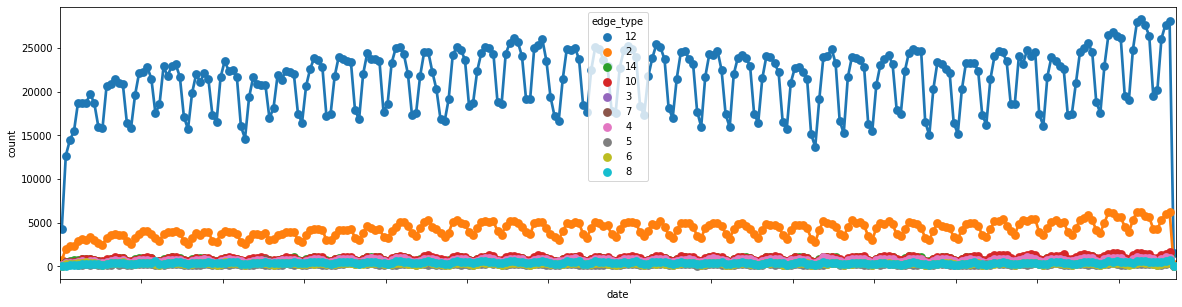

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))

sns.pointplot(
    x='date',
    y='count',
    hue='edge_type',
    # dashes= False,
    # marker='^',
    # color='pastel',
    # alpha=0.8,
    ax=axes,
    # data=data,
    data=top_10_edge_type_daily_count,
)

start, end = axes.get_xlim()
axes.xaxis.set_ticks(np.arange(start, end, 20))
for tick in axes.get_xticklabels():
    tick.set_rotation(90)

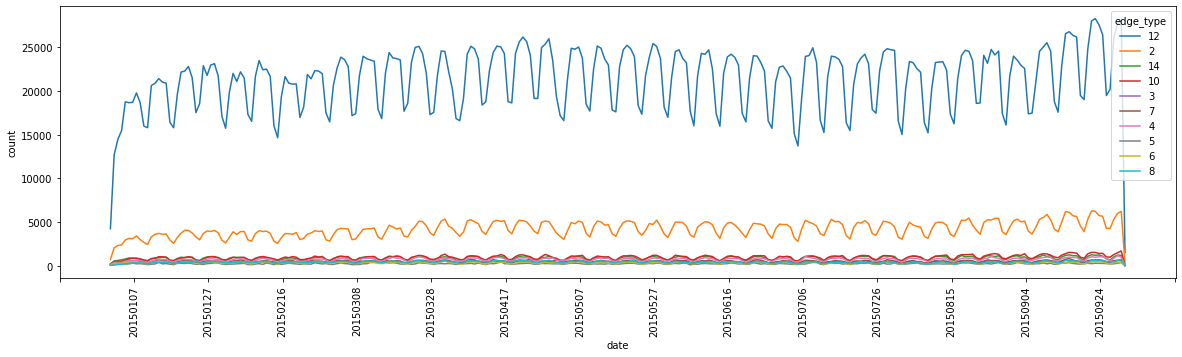

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))

sns.lineplot(
    x='date',
    y='count',
    hue='edge_type',
    # dashes= False,
    # marker='^',
    # color='pastel',
    # alpha=0.8,
    ax=axes,
    # data=data,
    data=top_10_edge_type_daily_count,
)

start, end = axes.get_xlim()
axes.xaxis.set_ticks(np.arange(start, end, 20))
for tick in axes.get_xticklabels():
    tick.set_rotation(90)